# Few parameter scaling for COVID-19 confirmed cases time series


## Model

We assume a simple dynamics for the increase of confirmed cases $N$:
$$
\frac{dN}{d\bar t} = N \cdot ( 1 - N/r) \,,
$$
where $\bar t$ is the natural intrinsic time scale of the virus spreading and $r$ is the maximum number of confirmed cases which we want to fit. $r$ is the net effect of all measures applied by a country to stop the spreading.

Being a separable differential equation, one gets
$$
 \bar t  = \ln \frac{N}{1-N/r} + {\rm const}
$$
This equation is the basis for collapsing all data on a single curve.

From this equation 
$$
 N = \frac{r}{1+ r \cdot \exp(-(\bar t - \bar t_0))}
$$
The pure exponential growth is recovered in the limit $r \to \infty$.

## Data

### European Centre for Disease Prevention and Control

Daily updates to data from ECDC is available at:
https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-YYYY-MM-DD.xlsx

### CSSEGISandData

We have the daily numbers of confirmed COVID-19 cases by countries online at
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

Note that the data are updated between 1:00 AM and 2:00 AM UTC. That means that the data are typically 1 day behind the actual values for Europe.


### Notes

The time series consists of days $[t_i]$ and (cumulated) confirmed cases $[N_i]$.

As confirmed by many, the initial increase after the outbreak is exponential.

Before the outbreak in each country one can see some confirmed cases which are imported to a country by traveling from some infested region.



## Fitting

Note that for any mathematical model, at least 3 fitting parameters are required (for each country)
* The unknown scale of the infection rate in units of days. Ideally, this should be independent of the country
* The time of the outbreak defining $\bar t_0$
* The predicted value of the total number of case $r$

For each country, we model the series using
$$
 t_i = A \ln \frac{N_i}{1-N_i/r} + B \,,
$$
where $A$ is basically the doubling rate (modulo factors of $ln 2$), $B$ is related to the time shift.

TODO can we get rid of B completely?

To remove the initial imported cases, we take data for each country starting with the first day over 50 cases.


## Results

Loading ... 
Country      Current (03/25/20)    Next day    Next week    Total (predicted)    Duplication rate (days)
---------  --------------------  ----------  -----------  -------------------  -------------------------
it                        69173       71721        85940                92255                       3.06
es                        39673       41438        51456                53682                       2.16
de                        31549       39772        69657                86410                       2.63
fr                        22296       23281        29722                32032                       2.64
kr*                        9130        9173         9377                 9500                       4.16
ch                         8789        9773        13359                14698                       2.58
uk                         8075        9290        16145                20456                       2.76
at                         5282        583

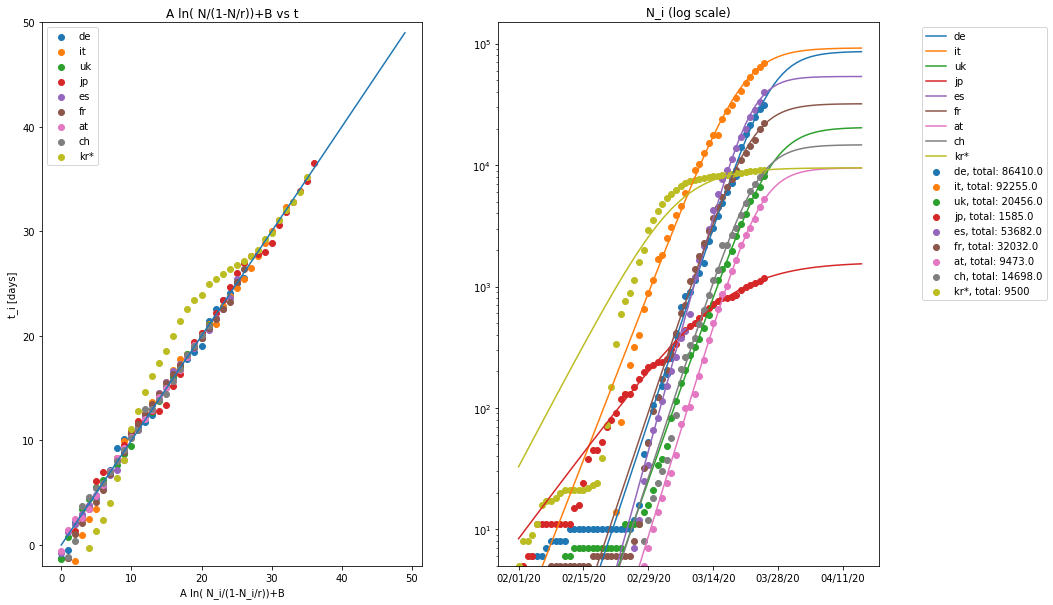

In [30]:
import sys
sys.path.insert(0, './COVID19') 
from importlib import reload
import logistic_model as lm
reload(lm)

model = lm.logistic_model(source='ecdc', endDate='2020-04-15', hide=['se','hu'])
#model.plot_raw('log')
model.plot_fitted('log')